In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graph_tool.all as gt
import networkx as nx
import os
import cowsay
sns.set_theme(style="whitegrid")
pwd = os.getcwd()
my_dpi=300
colmex = pd.read_csv(pwd + "/1_colmex_limpio.csv")
red_colmex = pd.read_csv(pwd +"/2_red_colmex_completa.csv")

### Resultados de encuesta limpios

In [2]:
colmex

,id,username,status,center
0,94496757,MGF91,former,CEE
1,52667287,magoreyes,current,CEE
2,1247720201501552641,Ar_charleston,former,CEE
3,45420967,ricardo_delao,former,CEE
4,818414802,Monsieur_JABS,current,CEI
...,...,...,...,...
305,3191354686,secolmex,current,ADM
306,2494626685,LoaezaSoledad,current,CEI
307,437200769,ommyareizaga,current,CEDUA
308,435299501,DeniseDresserG,former,CEI


### Resultados de descarga Twitter

In [3]:
red_colmex

,id,username,status,center,target,t_username,t_name
0,94496757,MGF91,former,CEE,4745020953,PlanasRodriguez,NuriaRodriguezPlanas
1,94496757,MGF91,former,CEE,222575693,HosteriaLaBota,Hostería La Bota.
2,94496757,MGF91,former,CEE,172526279,Adri_35,Adriana Garcia
3,94496757,MGF91,former,CEE,902275011486068736,AnaBerthaGtz,Ana B Gutiérrez
4,94496757,MGF91,former,CEE,335593579,Pauagudelo,Pau Agudelo
...,...,...,...,...,...,...,...
276359,176863968,Alextuto,former,CEI,167138820,khristiebloom,Cristina G ॐ
276360,176863968,Alextuto,former,CEI,141417962,Memo_e,Guillermo Esquivel
276361,176863968,Alextuto,former,CEI,145815514,ElMikelAntonio,Ai dise gratis. C-137
276362,176863968,Alextuto,former,CEI,3362741,sopitas,Sopitas


### Creamos funciones útiles para el análisis

In [4]:
# Una función que nos da el índice en Colmex al escribir el usuario
def index_colmex(username):
    try:
        index = colmex['username'].loc[lambda x: x==username].index[0]
        print("El index en Colmex de " + username + " es " + str(index))
    except IndexError:
        print ("El usuario no está en Colmex")

# Función que nos da el usuario y ID en Colmex al escribir el índice
def username_colmex(index):
    try:
        id = colmex['id'].iloc[index]
        user = colmex['username'].iloc[index]
        print("El username en Colmex del índice " + str(index) + " es " + user + ", ID: " + str(id))
    except IndexError:
        print ("El índice no está en Colmex")
# Función que nos dice cuántos following tiene un usuario
def following(username):
    summary = red_colmex.groupby('username').agg(following=('target', 'size')).reset_index().sort_values(['following'], ascending=False)
    return summary.loc[summary['username'] == username]

### Probamos las funciones

In [5]:
index_colmex("bruneitorres")

El index en Colmex de bruneitorres es 287


In [6]:
username_colmex(26)

El username en Colmex del índice 26 es JosueRM320, ID: 131106194


In [7]:
following("bruneitorres")

,username,following
146,bruneitorres,1383


## Análisis gráfico

In [8]:
summary_center = red_colmex.groupby('center') \
       .agg(usuarios=('username','nunique')) \
       .reset_index().sort_values(['usuarios'], ascending=False) 

In [9]:
summary_center

,center,usuarios
5,CEI,109
3,CEE,78
2,CEDUA,47
7,CES,25
4,CEH,16
0,ADM,13
6,CELL,7
1,CEAA,4


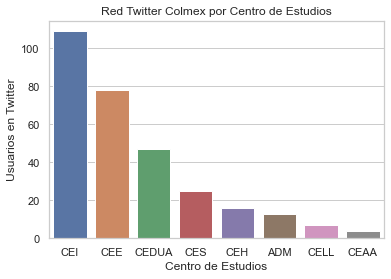

In [10]:
sns.barplot(x="center", y="usuarios", data=summary_center) \
.set(xlabel="Centro de Estudios", ylabel = "Usuarios en Twitter")
plt.title('Red Twitter Colmex por Centro de Estudios')
plt.savefig(pwd + '/figures/' + 'bar_centros.png', dpi=my_dpi,bbox_inches='tight')

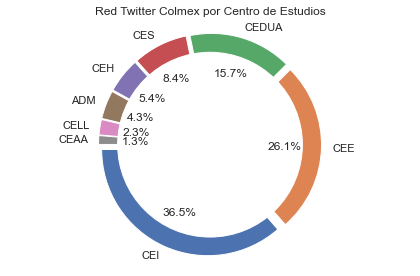

In [11]:
# plt.rcParams.update({'font.size': 9})
labels = summary_center.center
explode = [0.05]*8
fig1, ax1 = plt.subplots()
ax1.pie(summary_center.usuarios, labels=labels, autopct='%1.1f%%', startangle=180,pctdistance=0.65, explode = explode)
centre_circle = plt.Circle((0,0),0.87,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.title('Red Twitter Colmex por Centro de Estudios', fontsize=12)
plt.tight_layout()
fig1.savefig(pwd + '/figures/' + "pie_centros.png", dpi=my_dpi)

In [12]:
summary_status = colmex.groupby('status') \
       .agg(usuarios=('status', 'size')) \
       .reset_index().sort_values(['usuarios'], ascending=False) 

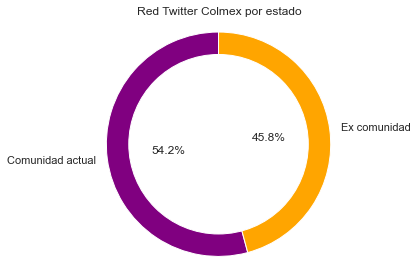

In [13]:
# plt.rcParams.update({'font.size': 9})
colors = ["purple", "orange"]
labels = ['Comunidad actual','Ex comunidad']
explode = [0.05]*2
fig1, ax1 = plt.subplots()
ax1.pie(summary_status.usuarios, labels=labels, autopct='%1.1f%%', startangle=90,pctdistance=0.45, colors=colors)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.title('Red Twitter Colmex por estado', fontsize=12)
plt.tight_layout()
fig1.savefig(pwd + '/figures/' + "pie_status.png", dpi=my_dpi)

In [14]:
summary_colmex = red_colmex.groupby(['status','center']) \
       .agg(usuarios=('username','nunique')) \
       .reset_index().sort_values(['usuarios'], ascending=False
       ) 

In [15]:
summary_colmex=summary_colmex.pivot(index='center',columns='status',values='usuarios')

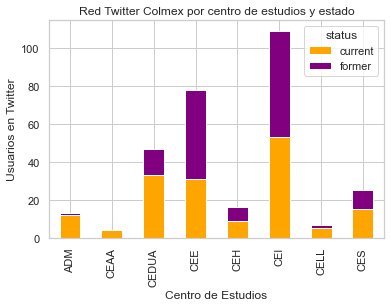

In [16]:
summary_colmex.plot(kind="bar", stacked=True,color=['orange', 'purple']).set(xlabel="Centro de Estudios", ylabel = "Usuarios en Twitter")
plt.title('Red Twitter Colmex por centro de estudios y estado')
plt.savefig(pwd + '/figures/' + 'bar_centros_status.png', dpi=my_dpi,bbox_inches='tight')

## Análisis descriptivo

In [17]:
# colmex

In [18]:
# red_colmex

In [19]:
following = red_colmex.groupby('username').agg(following=('target', 'size')).reset_index().sort_values(['following'], ascending=False)
following

,username,following
214,librocrepusculo,5861
145,bquevedo,5000
133,anagonmx,4510
176,estebanolhovich,4442
46,Glomarinagod,4238
...,...,...
183,fsomuano,20
59,JosueRM320,16
117,VelaDib,9
170,emilionazara,4


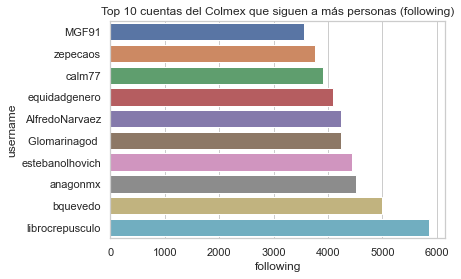

In [20]:
var = 'following'
ax = sns.barplot(x=var,
            y='username',
            data=following.sort_values(var).iloc[-10:])
plt.title('Top 10 cuentas del Colmex que siguen a más personas (following)')
plt.savefig(pwd + '/figures/' + 'top10_following.png', dpi=my_dpi,bbox_inches='tight')

In [21]:
followers = red_colmex.groupby('t_username').agg(followers=('t_username', 'size')).reset_index().sort_values(['followers'], ascending=False)
followers['rate'] = followers['followers']/colmex.shape[0]
followers

,t_username,followers,rate
79041,elcolmex,250,0.806452
80733,esquivelgerardo,236,0.761290
45851,Pajaropolitico,198,0.638710
95669,m_ebrard,181,0.583871
5513,AristeguiOnline,179,0.577419
...,...,...,...
18320,EduardoBizuet,1,0.003226
58612,UNICEFWestern,1,0.003226
58611,UNICEFUSA,1,0.003226
18321,EduardoCCorral,1,0.003226


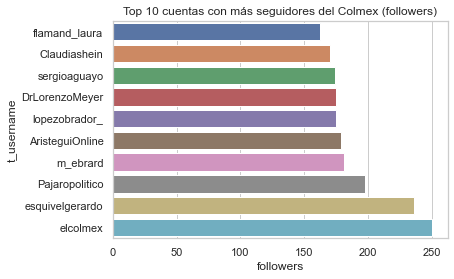

In [22]:
var = 'followers'
ax = sns.barplot(x=var,
            y='t_username',
            data=followers.sort_values(var).iloc[-10:])
plt.title('Top 10 cuentas con más seguidores del Colmex (followers)')
plt.savefig(pwd + '/figures/' + 'top10_followers.png', dpi=my_dpi,bbox_inches='tight')

In [23]:
followers_colmex = followers.loc[followers['t_username'].isin(colmex.username)]
len(followers_colmex.t_username.unique())

256

In [24]:
followers_notcolmex = followers.loc[followers['t_username'].isin(colmex.username)==False]
len(followers_notcolmex.t_username.unique())

117828

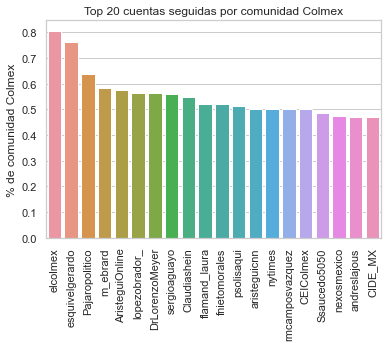

In [25]:
sns.barplot(x="t_username", y="rate", data=followers[0:20]) \
.set(xlabel="", ylabel = "% de comunidad Colmex")
plt.title('Top 20 cuentas seguidas por comunidad Colmex')
plt.xticks(rotation=90)
plt.savefig(pwd + '/figures/' + 'bar_topfollowing.png', dpi=my_dpi, bbox_inches='tight')

Text(0.5, 1.0, 'Top 20 cuentas seguidas por comunidad Colmex')

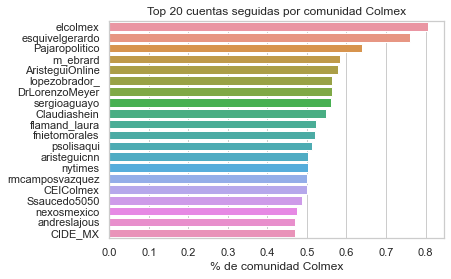

In [26]:
sns.barplot(x="rate", y="t_username", data=followers[0:20]) \
.set(xlabel="% de comunidad Colmex", ylabel = "")
plt.title('Top 20 cuentas seguidas por comunidad Colmex')

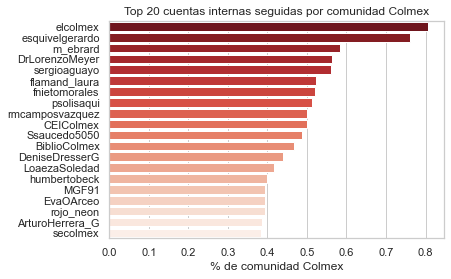

In [27]:
sns.barplot(x="rate", y="t_username", data=followers_colmex[0:20],palette="Reds_r") \
.set(xlabel="% de comunidad Colmex", ylabel = "")
plt.title('Top 20 cuentas internas seguidas por comunidad Colmex')
plt.savefig(pwd + '/figures/' + 'bar_topfollowing_colmex.png', dpi=my_dpi, bbox_inches='tight')

In [28]:
followers_colmex[0:10]

,t_username,followers,rate
79041,elcolmex,250,0.806452
80733,esquivelgerardo,236,0.761290
95669,m_ebrard,181,0.583871
17024,DrLorenzoMeyer,175,0.564516
110493,sergioaguayo,174,0.561290
82300,flamand_laura,162,0.522581
82446,fnietomorales,161,0.519355
106156,psolisaqui,159,0.512903
108125,rmcamposvazquez,155,0.500000
9159,CEIColmex,155,0.500000


In [29]:
followers_colmex = followers_colmex.merge(colmex, how='left', left_on='t_username', right_on='username')

followers_colmex[0:20]

,t_username,followers,rate,id,username,status,center
0,elcolmex,250,0.806452,118224151,elcolmex,current,ADM
1,esquivelgerardo,236,0.761290,72433740,esquivelgerardo,current,CEE
2,m_ebrard,181,0.583871,64798737,m_ebrard,former,CEI
3,DrLorenzoMeyer,175,0.564516,264380418,DrLorenzoMeyer,current,CEI
4,sergioaguayo,174,0.561290,35103616,sergioaguayo,current,CEI
5,flamand_laura,162,0.522581,2291367079,flamand_laura,current,CEI
6,fnietomorales,161,0.519355,220271264,fnietomorales,current,CEI
7,psolisaqui,159,0.512903,3321649578,psolisaqui,current,CES
8,rmcamposvazquez,155,0.500000,123715428,rmcamposvazquez,current,CEE
9,CEIColmex,155,0.500000,456751217,CEIColmex,current,CEI


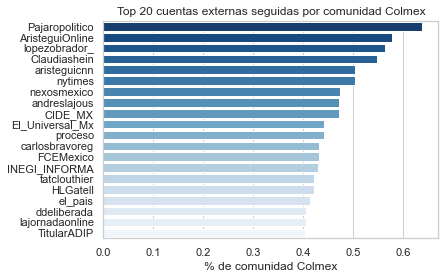

In [30]:
sns.barplot(x="rate", y="t_username", data=followers_notcolmex[0:20],palette="Blues_r") \
.set(xlabel="% de comunidad Colmex", ylabel = "")
plt.title('Top 20 cuentas externas seguidas por comunidad Colmex')
plt.savefig(pwd + '/figures/' + 'bar_topfollowing_notcolmex.png', dpi=my_dpi, bbox_inches='tight')

In [31]:
cowsay.cow(
    str(colmex.shape[0]) + ' usuarios registrados en Colmex comunidad.\n '
    + str(following.shape[0]) + ' usuarios con información disponible.\n '
    + str(red_colmex.shape[0]) + ' observaciones descargadas \n'
    + str(followers.shape[0]) + ' cuentas seguidas únicas\n'
    + str(followers_colmex.shape[0]) + ' cuentas seguidas internas del Colmex\n'
          )

  _____________________________________________
 /                                             \
| 310 usuarios registrados en Colmex comunidad. |
| 299 usuarios con información disponible.      |
| 276364 observaciones descargadas              |
| 118084 cuentas seguidas únicas                |
| 256 cuentas seguidas internas del Colmex      |
 \                                             /
                                                  \
                                                   \
                                                     ^__^                             
                                                     (oo)\_______                   
                                                     (__)\       )\/\             
                                                         ||----w |           
                                                         ||     ||  
                                                         
                                       

## Análisis externo

In [32]:
red_externa = red_colmex.loc[red_colmex['t_username'].isin(colmex.username)==False]

In [33]:
summary_externa = red_externa.groupby('center') \
       .agg(usuarios=('username','nunique'),following=('t_username', 'size'),following_unique=('t_username', 'nunique')) \
       .reset_index().sort_values(['usuarios'], ascending=False)
summary_externa['following_rate'] = summary_externa['following']/summary_externa['usuarios'] 
summary_externa['following_unique_rate'] = summary_externa['following_unique']/summary_externa['usuarios'] 
summary_externa.sort_values(['following_unique_rate'], ascending=False)


,center,usuarios,following,following_unique,following_rate,following_unique_rate
4,CEH,16,20493,14989,1280.812500,936.812500
7,CES,25,31535,23174,1261.400000,926.960000
2,CEDUA,47,36375,26109,773.936170,555.510638
5,CEI,109,108614,56799,996.458716,521.091743
6,CELL,7,3838,3511,548.285714,501.571429
3,CEE,78,58689,33692,752.423077,431.948718
0,ADM,13,4564,3641,351.076923,280.076923
1,CEAA,4,1072,1055,268.000000,263.750000


In [34]:
summary_externa.to_csv (pwd + "/4_resumen_externas.csv", index = False)

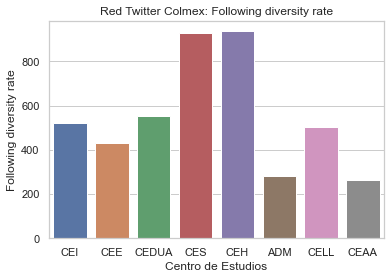

In [35]:
sns.barplot(x="center", y="following_unique_rate", data=summary_externa) \
.set(xlabel="Centro de Estudios", ylabel = "Following diversity rate")
plt.title('Red Twitter Colmex: Following diversity rate')
plt.savefig(pwd + '/figures/' + 'following_diversity.png', dpi=my_dpi,bbox_inches='tight')

In [36]:
cowsay.cow(
    str(len(red_externa.t_username.unique())) + ' cuentas externas seguidas por comunidad.\n '
          )

  _______________________________________________
< 117828 cuentas externas seguidas por comunidad. >
                                                    \
                                                     \
                                                       ^__^                             
                                                       (oo)\_______                   
                                                       (__)\       )\/\             
                                                           ||----w |           
                                                           ||     ||  
                                                           
                                                           
